In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

listings_file = "listings.csv"
# Read in dataframe
listings_df = pd.read_csv(listings_file)
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,11/4/2019,0.34,3,308
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,79,1,403,5/4/2021,5.16,1,208
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,6/5/2016,0.56,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,175,21,1,1/2/2014,0.01,1,134
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,61,2,474,9/25/2020,3.61,1,246


In [2]:
# Here I want to get a list of the group neighbourhoods
large_neighborhoods_list = listings_df["neighbourhood_group"].unique()
total_listings = len(listings_df)

In [4]:
# Now that I have a list of the group neighbourhoods I am going to find the percentage of listings for each
neighborhood_counts = listings_df["neighbourhood_group"].value_counts()
neighborhood_df = pd.DataFrame({"Total Listings": neighborhood_counts,
                                "Percentage of listings": ((neighborhood_counts/total_listings)*100).map("{:.2f}%".format)})
neighborhood_df

,Total Listings,Percentage of listings
Manhattan,15904,43.90%
Brooklyn,14239,39.30%
Queens,4785,13.21%
Bronx,1003,2.77%
Staten Island,299,0.83%


In [6]:
# Extract neighborhood names and Total Listings from dataframe
group_names = neighborhood_df.index
total_n_listings =[]
for x in range(len(neighborhood_df)):
    total_n_listings.append(neighborhood_df["Total Listings"][x])

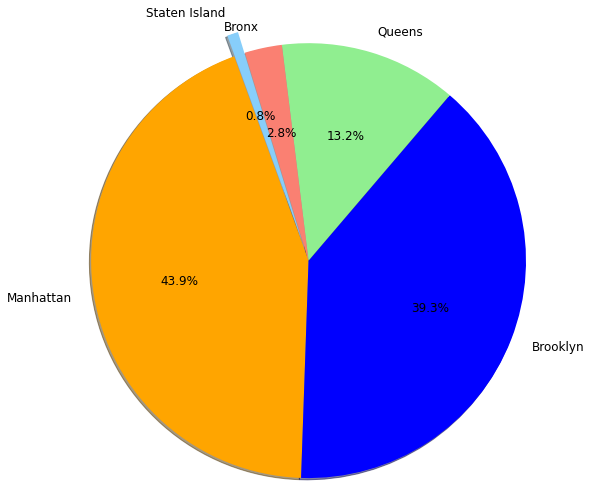

In [41]:
# Create a pi chart for the listing percentages per neighborhood 
labels = group_names
explode = (0, 0, 0, 0, 0.25)

colors = ["orange", "blue", "lightgreen", "salmon","lightskyblue"]

plt.pie(total_n_listings, labels=labels, explode=explode, autopct="%1.1f%%", shadow=True, startangle=110, radius =2.5, pctdistance=0.6, textprops={'fontsize': 12}, colors=colors)
plt.show()

In [ ]:
# Perform some calculations on the listing price by neighborhood 
neighborhood_group_df = listings_df.groupby(["neighbourhood_group"])
ave_price = neighborhood_group_df


tot_SN_spent = SN_grouped_df["Price"].sum()
avg_SN_spent = SN_grouped_df["Price"].mean()
SN_values = SN_grouped_df["Item ID"].count()

# Here I am grouping and printing the information
SN_purchasing_df = pd.DataFrame(SN_values)
SN_purchasing_df["Average Purchase Price"] = avg_SN_spent.map("${:.2f}".format)
SN_purchasing_df["Total Purchase Value"] = tot_SN_spent

#For some reason when I sort by Total Purchase Value it does not give the greatest prices 
SN_rename = SN_purchasing_df.rename(columns={"Item ID":"Purchase Count"})
SN_sorted = SN_rename.sort_values("Total Purchase Value",ascending=False)

SN_sorted["Total Purchase Value"] = tot_SN_spent.map("${:.2f}".format)
SN_sorted.head()